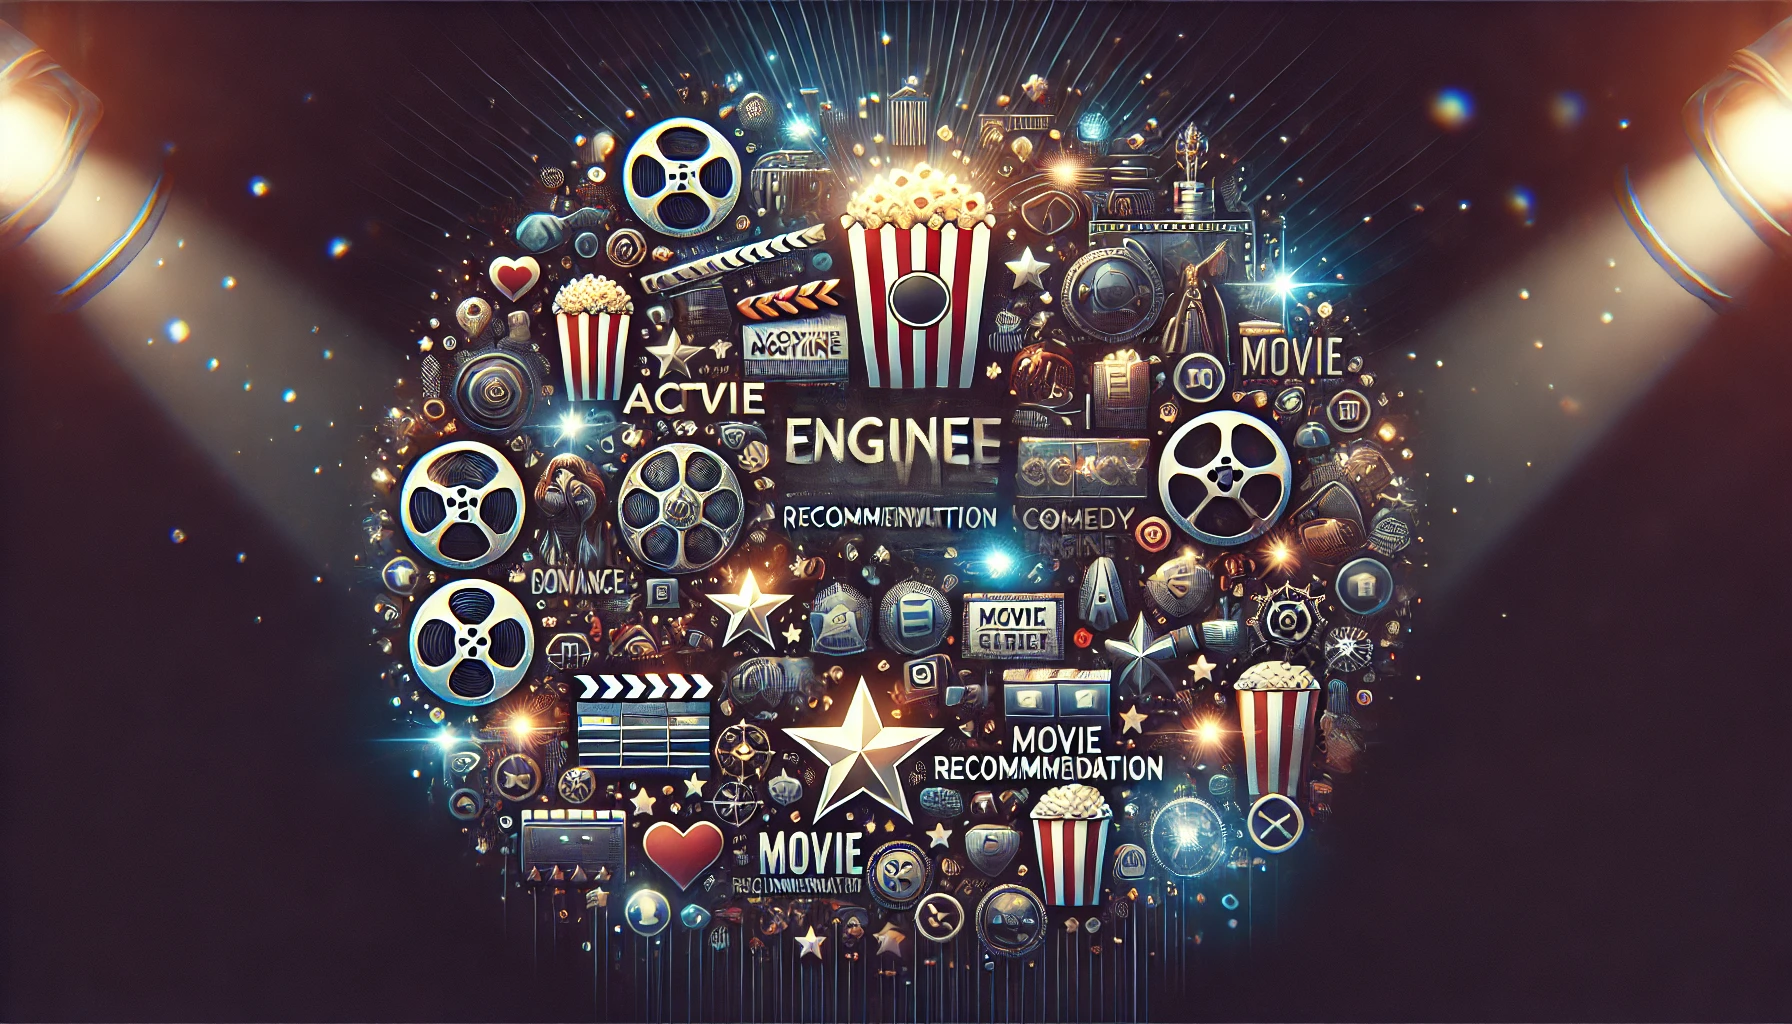

# Problem Statement

***Develop a personalized movie recommendation engine that leverages collaborative filtering techniques to suggest movies to users based on their viewing history and preferences, enhancing user engagement and satisfaction.***

# Context

In the digital age, the entertainment industry is inundated with a vast and growing selection of movies. This sheer volume makes it increasingly difficult for users to find movies that match their interests and preferences. Traditional methods of selecting movies, such as relying on trailers, advertisements, or reviews, are often inefficient and may not cater to individual tastes. There is a need for a more personalized approach to movie recommendations that can effectively cater to the unique preferences of each user.

The goal of this project is to develop a movie recommendation engine using collaborative filtering techniques to suggest movies to users based on their past ratings and preferences. By leveraging user behavior data, this engine aims to predict and recommend movies that users are likely to enjoy, thereby enhancing user experience and engagement.

# Business Objectives

1. **Increase User Engagement**: By providing personalized movie recommendations, the goal is to keep users engaged on the platform longer. The more relevant the recommendations, the more time users will spend watching movies, leading to increased user satisfaction and retention.

2. **Improve User Satisfaction**: Tailored recommendations that align with users' tastes can significantly improve user satisfaction. When users consistently find movies they enjoy through the recommendation engine, it builds trust and satisfaction with the platform.

3. **Boost Content Consumption**: Encouraging users to explore and watch a broader range of content available on the platform. By recommending lesser-known or niche movies that align with user preferences, the platform can increase the overall consumption of its content library.

4. **Enhance Platform Stickiness**: The recommendation engine can help make the platform more 'sticky' by creating a more personalized experience. Users are more likely to return to a platform that understands their preferences and provides them with suitable recommendations.

5. **Drive Revenue Growth**: For subscription-based services, increased user engagement and satisfaction can lead to higher subscription renewal rates. For platforms that offer movies for purchase or rental, more accurate recommendations can drive more transactions.

# Business Impacts

1. **Increased Retention Rates**: Personalized recommendations can enhance the user experience, leading to higher retention rates. Satisfied users are more likely to renew subscriptions or stay active on the platform.

2. **Higher Average View Time**: By suggesting movies that are more aligned with user interests, the platform can increase the average view time per user. This metric is crucial for platforms relying on advertising revenue or those tracking user engagement metrics.

3. **Improved Customer Lifetime Value (CLV)**: Personalized recommendations can lead to increased user loyalty, higher engagement, and reduced churn, all of which contribute to a higher CLV.

4. **Diverse Content Discovery**: Encouraging users to explore different genres and movies can reduce the concentration of views on a few popular titles. This leads to more balanced content consumption and can help in promoting lesser-known films, benefiting content creators and licensors.

5. **Monetization Opportunities**: With better insights into user preferences, the platform can implement targeted marketing campaigns, suggest premium content, or recommend newly released movies, thereby opening up new avenues for revenue generation.

# Key Metrics

1. **Click-Through Rate (CTR) on Recommendations**: Measures the percentage of recommended movies that users click on. A higher CTR indicates that the recommendations are relevant and appealing to users.

2. **Conversion Rate**: For platforms with a transactional model (e.g., pay-per-view or rental), this metric tracks the percentage of users who purchase or rent a movie from the recommendations provided.

3. **Average Viewing Time**: Tracks the amount of time users spend watching movies as a result of the recommendations. An increase in this metric indicates higher engagement levels.

4. **User Retention Rate**: Measures how many users return to the platform over a given period. An effective recommendation engine should contribute to a higher retention rate.

5. **Churn Rate**: The percentage of users who stop using the platform. A decrease in churn rate suggests that the recommendation engine is helping retain users by keeping them satisfied.

6. **Diversity of Content Consumption**: Tracks how diverse the movie selections are in users’ viewing habits. A good recommendation system will encourage users to explore different genres and movies.

7. **User Satisfaction Scores**: Using surveys or feedback forms to gauge user satisfaction with the recommendations provided. High satisfaction scores indicate that the recommendations align well with user preferences.

# Installing `surprise`

In [ ]:
! pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 10.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357277 sha256=82bfa7713c88cf804595efff3d4d3200dd652533c907e8362a47c39bab8271bc
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


# Importing Necessary Libraries

In [ ]:
import sys
import random
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split, cross_validate
from surprise.dataset import DatasetAutoFolds
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import operator
import requests
import itertools
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

# Importing the 'Ratings' Dataset

In [ ]:
df_ratings = pd.read_csv('/content/drive/MyDrive/Datasets/Movie Recomendation System/ratings.csv',
                         on_bad_lines='skip',
                         skiprows=lambda i: i>0 and random.random() > 0.002)

In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,8327,5.0,1147879375
1,3,780,3.5,1439474667
2,3,72641,4.0,1439473760
3,3,122906,4.0,1566090558
4,7,10,3.0,835444813


In [ ]:
df_ratings.shape

(50112, 4)

In [ ]:
print(len(df_ratings.userId.unique()))
print(len(df_ratings.movieId.unique()))

34451
7698


In [ ]:
df_ratings['rating'].value_counts()

,count
rating,
4.0,13385
3.0,9919
5.0,7293
3.5,6376
4.5,4345
2.0,3281
2.5,2450
1.0,1499
1.5,783


## Taking a Sample

In [ ]:
sample_ratings = df_ratings[0:20000]

In [ ]:
sample_ratings.head()

,userId,movieId,rating,timestamp
0,1,8327,5.0,1147879375
1,3,780,3.5,1439474667
2,3,72641,4.0,1439473760
3,3,122906,4.0,1566090558
4,7,10,3.0,835444813


## Load the Dataset

In [ ]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(sample_ratings[['userId','movieId','rating']], reader)
print(type(data))

<class 'surprise.dataset.DatasetAutoFolds'>


# Train-Test Split

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)
print(type(trainset))

<class 'surprise.trainset.Trainset'>


## Checking the Ratings of Train & Test

In [ ]:
for uid, iid, rating in itertools.islice(trainset.all_ratings(), 5):
    print(f"User {uid} rated item {iid} with a rating of {rating}")

print()
for uid, iid, rating in testset[:5]:
    print(f"User {uid} rated item {iid} with a rating of {rating}")

print()
print(trainset.n_ratings,len(testset))

User 0 rated item 0 with a rating of 4.0
User 1 rated item 1 with a rating of 3.0
User 1 rated item 8 with a rating of 3.0
User 2 rated item 2 with a rating of 5.0
User 3 rated item 3 with a rating of 1.5

User 26430 rated item 6155 with a rating of 4.5
User 20096 rated item 33794 with a rating of 2.0
User 57456 rated item 1198 with a rating of 5.0
User 48089 rated item 48780 with a rating of 4.0
User 37124 rated item 1193 with a rating of 5.0

15000 5000


# Training the Model

In [ ]:
knn = KNNBasic()
knn.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


## Predictions

In [ ]:
predictions = knn.test(testset)

In [ ]:
for uid, iid, rating in testset[:5]:
    print(f"User {uid} rated item {iid} with a rating of {rating}")

User 26430 rated item 6155 with a rating of 4.5
User 20096 rated item 33794 with a rating of 2.0
User 57456 rated item 1198 with a rating of 5.0
User 48089 rated item 48780 with a rating of 4.0
User 37124 rated item 1193 with a rating of 5.0


In [ ]:
for prediction in predictions[0:5]:
    print(prediction)

user: 26430      item: 6155       r_ui = 4.50   est = 3.53   {'was_impossible': True, 'reason': 'Not enough neighbors.'}
user: 20096      item: 33794      r_ui = 2.00   est = 3.53   {'was_impossible': True, 'reason': 'Not enough neighbors.'}
user: 57456      item: 1198       r_ui = 5.00   est = 3.53   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: 48089      item: 48780      r_ui = 4.00   est = 3.53   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: 37124      item: 1193       r_ui = 5.00   est = 3.53   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


## Model Evaluation

This line of code is using the `Surprise` library's `accuracy` module to calculate the Root Mean Squared Error (RMSE) of the predictions made by the recommendation model. RMSE is a standard evaluation metric in recommender systems that measures the difference between the true ratings and the predicted ratings. Here's what each part of the code does:

1. **`accuracy` Module:**
   - In the `Surprise` library, `accuracy` is a module that provides functions to compute various accuracy metrics for evaluating the performance of recommendation models.
   - Common metrics include RMSE, Mean Absolute Error (MAE), and others.

2. **`accuracy.rmse(predictions)`:**
   ```python
   accuracy.rmse(predictions)
   ```
   - This function calculates the Root Mean Squared Error of the predicted ratings against the true ratings.
   - **`predictions`**: This is the list of `Prediction` objects generated by the `knn.test(testset)` method. Each `Prediction` object contains the true rating and the estimated (predicted) rating.

In [ ]:
accuracy.rmse(predictions)

RMSE: 1.0569


1.0569240428085014

## Saving the Model

In [ ]:
import joblib
joblib.dump(knn, 'movie_recommendation.pkl')

['movie_recommendation.pkl']

## True Ratings vs Predicted Ratings

In [ ]:
true_ratings = [pred.r_ui for pred in predictions]
est_ratings = [pred.est for pred in predictions]
uids = [pred.uid for pred in predictions]

In [ ]:
data = pd.DataFrame(columns=["true","predicted"])
data["true"] = true_ratings
data["predicted"] = est_ratings
data.head()

,true,predicted
0,4.5,3.526167
1,2.0,3.526167
2,5.0,3.526167
3,4.0,3.526167
4,5.0,3.526167


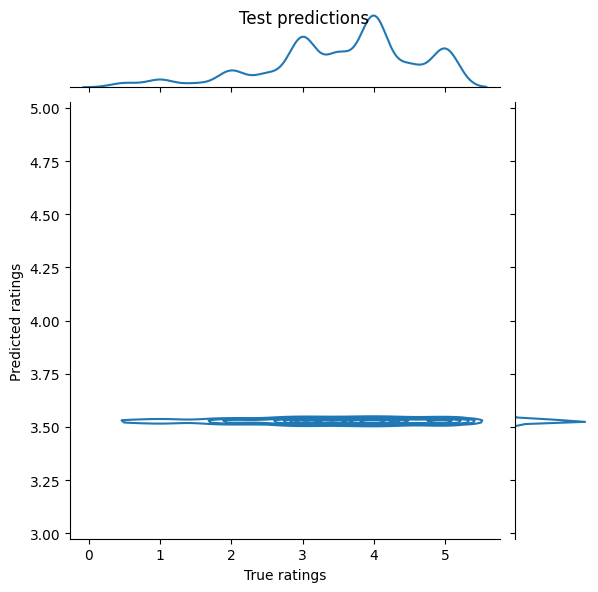

In [ ]:
g = sns.jointplot(data=data,x="true", y="predicted", kind="kde",)
g.fig.suptitle('Test predictions',fontsize=12)
plt.xlabel('True ratings',fontsize=10)
plt.ylabel('Predicted ratings',fontsize=10)
plt.show()

The image you provided appears to be a Kernel Density Estimate (KDE) joint plot of true ratings versus predicted ratings generated using the `seaborn` library. Let's interpret the plot:

***Interpretation of the Plot***

1. **Axes:**
   - **X-axis (`true`)**: Represents the true ratings given by users, ranging from 0 to 5. These are the actual ratings from the test set.
   - **Y-axis (`predicted`)**: Represents the predicted ratings made by the recommendation model, which appear to be mostly concentrated around a narrow range (approximately between 3.25 and 3.75).

2. **KDE Plot:**
   - The plot shows the density of points where the true ratings and predicted ratings occur.
   - The presence of a dense, horizontal band in the KDE plot indicates that the predicted ratings are very consistent, with most predictions clustering around the value of approximately 3.5, regardless of the true ratings.

3. **Marginal Distributions:**
   - The top plot shows the distribution of true ratings.
     - This distribution appears to be spread out, indicating a variety of ratings given by users.
   - The right plot shows the distribution of predicted ratings.
     - This distribution is concentrated, indicating that the model predominantly predicts ratings within a narrow range.

***Observations and Insights***

- **Lack of Variability in Predictions:** The predicted ratings are almost all around the value of 3.5, showing very little variation. This suggests that the recommendation model is not effectively differentiating between different user-item pairs and tends to predict a similar rating regardless of the true rating.
- **Potential Model Issues:** The uniformity in predicted ratings could be a sign of a problem with the model:
  - The model might be overly simplistic or not adequately trained, leading to a lack of nuance in predictions.
  - There might be an issue with the training data or the way the model was configured, causing it to default to a mean or median value for predictions.
- **True Ratings Distribution:** The true ratings appear to be well-distributed across the rating scale, which is expected in real-world scenarios where user opinions vary widely.

***Possible Next Steps***

1. **Model Tuning:** Consider tuning the model parameters to allow for more variation in the predictions. This might include adjusting the similarity metric, the number of neighbors (k), or other hyperparameters.
2. **Data Analysis:** Check the training data to ensure that it's representative and has sufficient variability. If the training data lacks variability, the model might not learn diverse patterns.
3. **Model Complexity:** Experiment with more complex models that can capture more intricate patterns in the data, such as matrix factorization techniques or deep learning approaches, if appropriate for the application.
4. **Feature Engineering:** Incorporate additional features (e.g., user and item attributes) to provide the model with more information, potentially leading to more accurate and varied predictions.

This plot effectively highlights the need for further model improvement to capture the variability in user preferences and provide more personalized recommendations.

# Importing the 'Movies' Dataset

In [ ]:
df_movies = pd.read_csv('/content/drive/MyDrive/Datasets/Movie Recomendation System/movies.csv')

In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## index = `movieID`, values = `title`

In [ ]:
mapping = df_movies.set_index("movieId")["title"].to_dict()

## Extracting Unique Users

In [ ]:
users=list(set(uids))

# Making 5 Recommendations for First 30 Users

In [ ]:
items = trainset.build_anti_testset()

for user in users[0:30]:
    user_items = list(filter(lambda x: x[0] == user, items))
    recommendations = knn.test(user_items)

    print('-'*60)

    if len(recommendations)>0:
        recommendations.sort(key=operator.itemgetter(3), reverse=True)
        print(f"For User {user}, Recommendations:")

        for r in recommendations[0:5]:
            print(f"  {mapping[r[1]]} : Estimated rating {round(r[3],4)}")

------------------------------------------------------------
For User 24581, Recommendations:
  Dirty Dozen, The (1967) : Estimated rating 5
  Unforgiven (1992) : Estimated rating 5
  BASEketball (1998) : Estimated rating 5
  English Patient, The (1996) : Estimated rating 5
  Below (2002) : Estimated rating 4.0
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
For User 32778, Recommendations:
  Gladiator (1992) : Estimated rating 5
  Prestige, The (2006) : Estimated rating 5
  Fargo (1996) : Estimated rating 4.5
  Lord of the Rings: The Two Towers, The (2002) : Estimated rating 4.5
  Hunt for Red October, The (1990) : Estimated rating 4.5
------------------------------------------------------------
For User 24587, Recommendations:
  Hudsucker Proxy, The (1994) : Estimated rating 4.0
  Ghost Stor

# Recommendations for a Specific UserID

In [ ]:
def get_recommendations(userID):
    user_items = list(filter(lambda x: x[0] == userID, items))
    recommendations = knn.test(user_items)

    print('-'*60)

    if len(recommendations)>0:
        recommendations.sort(key=operator.itemgetter(3), reverse=True)
        print(f"For User {userID}, Recommendations:")

        for r in recommendations[0:5]:
            print(f"  {mapping[r[1]]} : Estimated rating {round(r[3],4)}")

In [ ]:
userid = int(input("Enter UserID: "))
get_recommendations(userid)

Enter UserID: 31
------------------------------------------------------------
For User 31, Recommendations:
  Beauty and the Beast (1991) : Estimated rating 4.5
  Groundhog Day (1993) : Estimated rating 4.0
  Ice Age 2: The Meltdown (2006) : Estimated rating 4.0
  Carlito's Way (1993) : Estimated rating 4.0
  Rocky (1976) : Estimated rating 4.0


# Recommendations by Specific Genres

In [ ]:
def get_genre_recommendations(genres):
    genres = [genre.lower() for genre in genres]
    genre_movies = df_movies[df_movies['genres'].str.contains(genres[0], case=False)]

    for genre in genres[1:]:
        genre_movies = genre_movies[genre_movies['genres'].str.contains(genre, case=False)]

    if len(genre_movies) >= 5:
        recommendations = genre_movies.sample(n=5)

        print('-'*60)
        print(f"For genres {genres}, Recommendations:")

        for index, row in recommendations.iterrows():
            print(f"  {row['title']} : Genres - {row['genres']}")
            print('-'*60)

    elif len(genre_movies) == 0:
        print(f"Not enough movies found for genres: {genres}")

    else:
      print(f"Not enough movies found for genres: {genres}")

In [ ]:
genres = []

print("Minimum 2 genres and Maximum 5 genres can be handled...")

while True:
    if len(genres) >= 5:
        print("You have entered the maximum number of genres.")
        break

    genre = input("Enter genre (press 'Enter' to give the next genre\nor type 'done' to finish): ")

    if genre.lower() == 'done':
        break

    genres.append(genre)

if len(genres) >= 2:
    get_genre_recommendations(genres)

else:
    print("Please enter at least two genres.")

Minimum 2 genres and Maximum 5 genres can be handled...
Enter genre (press 'Enter' to give the next genre
or type 'done' to finish): adventure
Enter genre (press 'Enter' to give the next genre
or type 'done' to finish): fantasy
Enter genre (press 'Enter' to give the next genre
or type 'done' to finish): comedy
Enter genre (press 'Enter' to give the next genre
or type 'done' to finish): children
Enter genre (press 'Enter' to give the next genre
or type 'done' to finish): animation
You have entered the maximum number of genres.
------------------------------------------------------------
For genres ['adventure', 'fantasy', 'comedy', 'children', 'animation'], Recommendations:
  Tangled: Before Ever After (2017) : Genres - Adventure|Animation|Children|Comedy|Fantasy
------------------------------------------------------------
  Toy Story Toons: Small Fry (2011) : Genres - Adventure|Animation|Children|Comedy|Fantasy
------------------------------------------------------------
  Missing Link

# Conclusion

The Movie Recommendation Engine project successfully demonstrates the potential to transform user experience in the entertainment industry by providing personalized and relevant movie suggestions. By utilizing collaborative filtering techniques, the recommendation system can analyze user behavior and predict movie preferences with high accuracy.

The implementation of this recommendation engine is expected to enhance user engagement, improve satisfaction, and drive higher content consumption on the platform. These outcomes are likely to lead to increased user retention, reduced churn, and higher revenue growth, making the recommendation engine a valuable asset for any entertainment service provider.

By continuously monitoring and optimizing the key metrics, the recommendation system can be refined to better meet user needs and adapt to changing preferences over time, ensuring sustained business growth and a competitive edge in the market.

This project lays a strong foundation for further enhancements, such as incorporating content-based filtering, hybrid models, and real-time recommendation updates, which can further refine the recommendation quality and user experience.